In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('C:\\Users\\ARIJIT\\Downloads\\Project\\fer2013.csv')
data.shape

(35887, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [9]:
data.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [10]:
data.emotion.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64>

In [11]:
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [12]:
data.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [13]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Fear,5121
2,Sad,6077
3,Neutral,6198
4,Happy,8989
5,Surprise,4002
6,Digust,547


In [14]:
data['emotion'].value_counts(sort=False).reset_index()

,index,emotion
0,0,4953
1,2,5121
2,4,6077
3,6,6198
4,3,8989
5,5,4002
6,1,547


D:\Anaconda\Installed\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


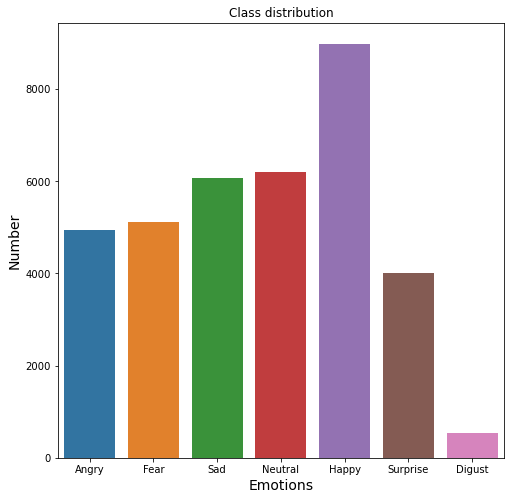

In [15]:
plt.figure(figsize=(8,8))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=14)
plt.xlabel('Emotions', fontsize=14)
plt.show()

In [16]:
pixels = data.pixels.iloc[0].split()
len(pixels)

2304

C:\Users\ARIJIT\AppData\Local\Temp/ipykernel_11444/2570121594.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([img.astype(np.uint8), emotion])


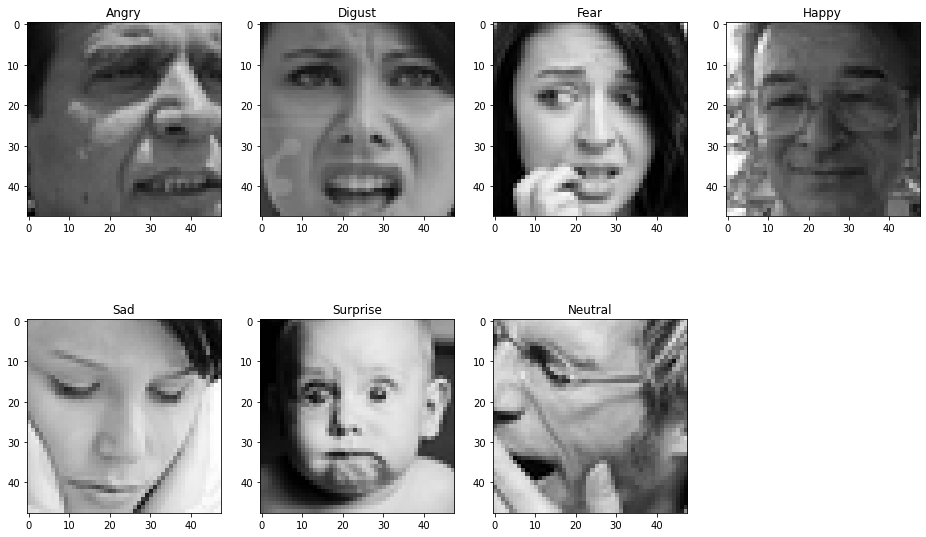

In [17]:
def convert_to_image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48,48)

    return np.array([img.astype(np.uint8), emotion])

plt.figure(0, figsize=(16,10))
for i in range(1,8):
    face = data[data['emotion'] == i-1].iloc[4]
    img = convert_to_image(face)
    plt.subplot(2,4,i)
    plt.imshow(img[0], cmap='gray', vmin=0, vmax=255)
    plt.title(img[1])

plt.show()

In [10]:
#split data into training, validation and test set
data_train = data[data['Usage']=='Training'].copy()
data_val   = data[data['Usage']=='PublicTest'].copy()
data_test  = data[data['Usage']=='PrivateTest'].copy()
print(f"train shape: {data_train.shape},\
        \nvalidation shape: {data_val.shape},\
        \ntest shape: {data_test.shape}")

train shape: (28709, 3),        
validation shape: (3589, 3),        
test shape: (3589, 3)


In [11]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
for i in Y.index:
    print(emotion_map[i])

NameError: name 'Y' is not defined

In [ ]:
z = data_test['emotion'].value_counts(sort=False)
for i in z.index:
    print(emotion_map[i])

In [ ]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
def setup_axe(axe,df,title):
    y = df['emotion'].value_counts(sort=False)
    pos = [i for i in range(10,71,10)]
    axe.bar(pos, y, width=4)
    axe.set_xticks(pos)
    axe.set_xticklabels([emotion_map[i] for i in y.index], fontsize=14)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Number")
    axe.set_title(title)
   
fig, ax = plt.subplots(1,3, figsize=(25, 10), sharey=True) 
setup_axe(ax[0],data_train,'train')
setup_axe(ax[1],data_val,'validation')
setup_axe(ax[2],data_test,'test')
plt.show()

In [ ]:
data_train['pixels']

In [ ]:
for i in range(28708):
    print(data_train['pixels'][i].split())
    break

In [ ]:
data_train['emotion']

In [ ]:
width, height = 48, 48

def prep(df, dataName):
    df['pixels'] = df['pixels'].apply(lambda pixel_sequence: [int(pixel) for pixel in pixel_sequence.split()])
    data_X = np.array(df['pixels'].tolist(), dtype='int64').reshape(-1,width, height,1)/255.0   
    data_Y = df['emotion'].to_numpy()  
    print(f'{dataName}_X shape: {data_X.shape}, {dataName}_Y shape: {data_Y.shape}')
    return data_X, data_Y

    
train_X, train_Y = prep(data_train, "train")
val_X, val_Y     = prep(data_val, "val")
test_X, test_Y   = prep(data_test, "test")

In [ ]:
type(train_X)

In [ ]:
train_Y

# 2nd model

In [12]:
# get the data
filname = 'C:\\Users\\ARIJIT\\Downloads\\Project\\fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('C:\\Users\\ARIJIT\\Downloads\\Project\\fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [21]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [22]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [23]:
# keras with tensorflow backend
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [25]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [26]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       4

In [27]:
from keras import backend as K
path_model='model_filter.h5' # save model at this location after each epoch
#K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
#K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/20
505/505 [==============================] - 536s 1s/step - loss: 1.6672 - accuracy: 0.3516 - val_loss: 1.4920 - val_accuracy: 0.4129
Epoch 2/20
505/505 [==============================] - 527s 1s/step - loss: 1.2909 - accuracy: 0.5106 - val_loss: 1.6137 - val_accuracy: 0.4338
Epoch 3/20
505/505 [==============================] - 552s 1s/step - loss: 1.1138 - accuracy: 0.5814 - val_loss: 1.2242 - val_accuracy: 0.5414
Epoch 4/20
505/505 [==============================] - 558s 1s/step - loss: 0.9885 - accuracy: 0.6324 - val_loss: 1.0813 - val_accuracy: 0.5946
Epoch 5/20
505/505 [==============================] - 524s 1s/step - loss: 0.8687 - accuracy: 0.6781 - val_loss: 1.0908 - val_accuracy: 0.5993
Epoch 6/20
505/505 [==============================] - 509s 1s/step - loss: 0.7388 - accuracy: 0.7274 - val_loss: 1.1652 - val_accuracy: 0.5882
Epoch 7/20
505/505 [==============================] - 515s 1s/step - loss: 0.5858 - accuracy: 0.7862 - val_loss: 1.5877 - val_accuracy: 0.5210

In [28]:
h = h.history

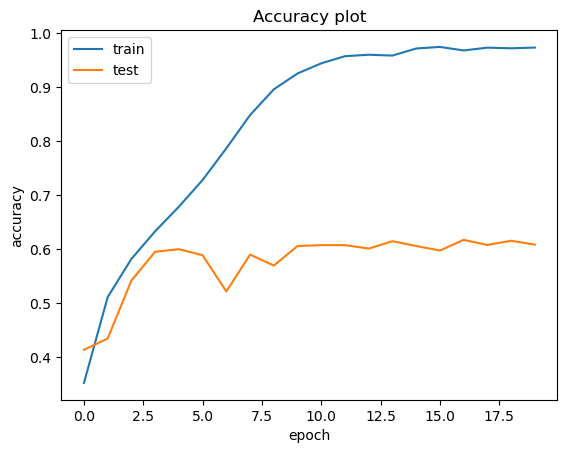

In [29]:
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("3rdmodel.png")

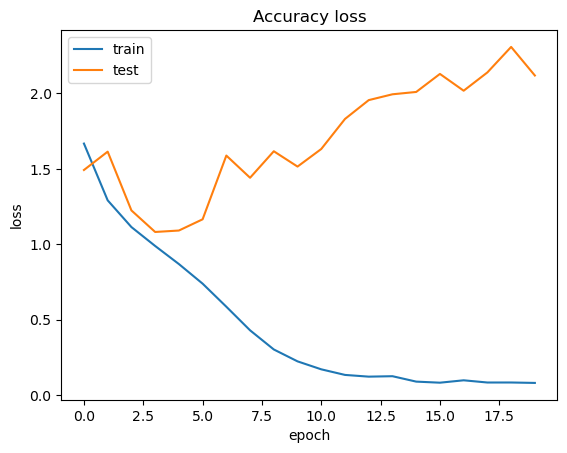

In [30]:
plt.plot(h["loss"])
plt.plot(h["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("vgg19v2_loss.png")

NameError: name 'path_model' is not defined

113/113 [==============================] - 18s 149ms/step - loss: 2.3572 - accuracy: 0.5940


[2.357163429260254, 0.5940373539924622]